In [13]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data_path = './data/'

In [3]:
aq_stations = pd.read_csv(data_path+'station_info.csv')
grid_meo_stations = pd.read_csv(data_path+'Beijing_grid_weather_station.csv')
meo_stations = pd.read_csv(data_path+'observedWeather_201701-201801.csv')

In [4]:
aq_stations.head()

,station_id,longitude,latitude,sitetype
0,dongsi,116.417,39.929,urban
1,tiantan,116.407,39.886,urban
2,guanyuan,116.339,39.929,urban
3,wanshouxigong,116.352,39.878,urban
4,aotizhongxin,116.397,39.982,urban


In [5]:
grid_meo_stations.head()

,station_id,latitude,longitude
0,beijing_grid_000,39.0,115.0
1,beijing_grid_001,39.1,115.0
2,beijing_grid_002,39.2,115.0
3,beijing_grid_003,39.3,115.0
4,beijing_grid_004,39.4,115.0


In [6]:
meo_stations.head()

,station_id,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed,weather
0,shunyi_meo,116.615278,40.126667,2017-01-30 16:00:00,-1.7,1028.7,15,215.0,1.6,Sunny/clear
1,shunyi_meo,116.615278,40.126667,2017-01-30 17:00:00,-3.5,1028.4,24,16.0,1.0,Haze
2,shunyi_meo,116.615278,40.126667,2017-01-30 18:00:00,-3.7,1028.1,27,32.0,1.1,Haze
3,shunyi_meo,116.615278,40.126667,2017-01-30 19:00:00,-3.9,1027.6,27,21.0,0.9,Haze
4,shunyi_meo,116.615278,40.126667,2017-01-30 20:00:00,-4.1,1026.7,26,17.0,1.1,Haze


In [7]:
def get_station_locations(stations_df):
    '''
    Get all the locations of stations in stations_df.
    Agrs : 
        stations_df : a dataframe of all station data.
    Return : 
        A list of (station_name, (longitude, latitude))
    '''
    
    locations = []
    station_names = []
    
    if 'station_id' in stations_df.columns:
        station_column_name = 'station_id'
    elif 'stationName' in stations_df.columns:
        station_column_name = 'stationName'
    else :
        print("Can not find station name!")
    
    for j in stations_df.index:
        station_name = stations_df[station_column_name][j]
        if station_name not in station_names:
            station_names.append(station_name)
            longitude = stations_df['longitude'][j]
            latitude = stations_df['latitude'][j]
            location = (longitude, latitude)
            # station_name = stations_df[station_column_name][j]
            locations.append((station_name, location))
    
    return locations

In [9]:
grid_meo_stations = grid_meo_stations.head(651)
meo_locations = get_station_locations(meo_stations)
grid_meo_locations = get_station_locations(grid_meo_stations)
aq_locations = get_station_locations(aq_stations)
print("There are %d meo stations in Beijing." %(len(meo_locations)))
print("There are %d grid meo stations in Beijing." %(len(grid_meo_locations)))
print("There are %d air quality stations in Beijing." %(len(aq_locations)))

There are 18 meo stations in Beijing.
There are 651 grid meo stations in Beijing.
There are 35 air quality stations in Beijing.


In [10]:
def get_location_lists(locations):
    '''
    Get location list from locations.
    Args : 
        A list with element shape (station_name, (longitude, latitude)).
    Return : 
        Two lists of longitudes and latitudes.
    '''
    longitudes = []
    latitudes = []
    
    for i in range(len(locations)):
        _, (longitude, latitude) = locations[i]
        longitudes.append(longitude)
        latitudes.append(latitude)
        
    return longitudes, latitudes

In [11]:
meo_locations_longitudes, meo_locations_latitudes = get_location_lists(meo_locations)
grid_meo_locations_longitudes, grid_meo_locations_latitudes = get_location_lists(grid_meo_locations)
aq_locations_longitudes, aq_locations_latitudes = get_location_lists(aq_locations)

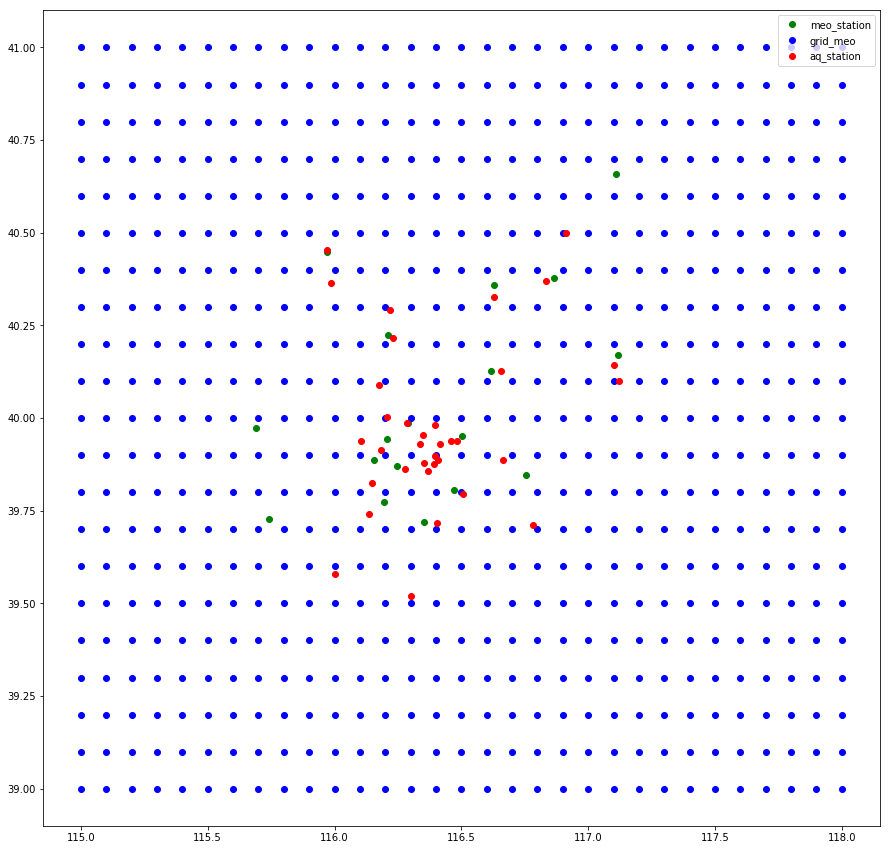

In [14]:
plt.rc("figure", figsize=(15,15));
plt.plot(meo_locations_longitudes, meo_locations_latitudes, "go", label="meo_station");
plt.plot(grid_meo_locations_longitudes, grid_meo_locations_latitudes, "bo", label="grid_meo");
plt.plot(aq_locations_longitudes, aq_locations_latitudes, "ro", label="aq_station");
plt.legend();

In [15]:
def find_nearst_meo_station_name(aq_location, meo_locations):
    '''
    From meo stations ans grid meos stations, find the nearest meo station of aq station.
    Args :
        aq_location : an aq station information of (station_name, (longitude, latitude))
        meo_locations : meo information, list of ((station_name, (longitude, latitude)))
    '''
    nearest_station_name = ""
    nearest_distance = 1e10
    
    aq_station_longitude = aq_location[1][0]
    aq_station_latitude = aq_location[1][1]
    
    for station_name, (longitude, latitude) in meo_locations:
        dis = np.sqrt((longitude-aq_station_longitude)**2 + (latitude-aq_station_latitude)**2)
        if dis < nearest_distance:
            nearest_distance = dis
            nearest_station_name = station_name
    
    return nearest_station_name

In [16]:
aq_station_nearest_meo_station = {}

stations = grid_meo_locations

for aq_station in aq_locations:
    nearest_meo_station_name = find_nearst_meo_station_name(aq_station, stations)
    aq_station_nearest_meo_station[aq_station[0]] = nearest_meo_station_name

In [17]:
aq_station_nearest_meo_station

{'aotizhongxin': 'beijing_grid_304',
 'badaling': 'beijing_grid_224',
 'beibuxinqu': 'beijing_grid_263',
 'daxing': 'beijing_grid_301',
 'dingling': 'beijing_grid_265',
 'donggaocun': 'beijing_grid_452',
 'dongsi': 'beijing_grid_303',
 'dongsihuan': 'beijing_grid_324',
 'fangshan': 'beijing_grid_238',
 'fengtaihuayuan': 'beijing_grid_282',
 'guanyuan': 'beijing_grid_282',
 'gucheng': 'beijing_grid_261',
 'huairou': 'beijing_grid_349',
 'liulihe': 'beijing_grid_216',
 'mentougou': 'beijing_grid_240',
 'miyun': 'beijing_grid_392',
 'miyunshuiku': 'beijing_grid_414',
 'nansanhuan': 'beijing_grid_303',
 'nongzhanguan': 'beijing_grid_324',
 'pingchang': 'beijing_grid_264',
 'pinggu': 'beijing_grid_452',
 'qianmen': 'beijing_grid_303',
 'shunyi': 'beijing_grid_368',
 'tiantan': 'beijing_grid_303',
 'tongzhou': 'beijing_grid_366',
 'wanliu': 'beijing_grid_283',
 'wanshouxigong': 'beijing_grid_303',
 'xizhimenbei': 'beijing_grid_283',
 'yanqin': 'beijing_grid_225',
 'yizhuang': 'beijing_grid_3